<a href="https://colab.research.google.com/github/corinaccqf/unsupervised-learning/blob/main/Clustering_with_Gaussian_mixture_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What is Gaussian Mixture Models (GMMs)**

Gaussian Mixture Models (GMMs) aim to find the data generating processes by assuming that the data is generated by a mixture of several Gaussian distributions. Gaussian distribution may sound unfamiliar to you but don't worry, it's the very normal distribution itself. Hence, GMM aims to find the normal distributions that generated our data. More specifically, GMM searches for the Gaussian distributions for each of the clusters in the data. Since the full data is the combination of all of the clusters, GMM models the data as a mixture of the Gaussian distributions where the number of these distributions is equal to the number of clusters in the data.

The assumption of our data being generated by a mix of normal distributions may sound too strong. But, if you recall the Central Limit Theorem, it states that if we have enough samples from a population, the means of the samples converge to a normal distribution no matter the original distribution of the population. Counting on this theorem, GMM searches for the means and the standard deviations of the Gaussian (normal) distributions. More formally, each observation
x
i
 is assumed to be drawn from the mixture of these Gaussians:

## **GMM in action**

Now, we run the GMM on the Iris dataset. Recall that previous clustering algorithms we discussed in this module were run by using the cluster module of the scikit-learn. However, GMM is available through another module of scikit-learn which is called mixture. In general, this module implements several Gaussian Mixture Models.

We first import the packages we use:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

As usual, we load the Iris dataset from scikit-learn's datasets module. GMM is also sensitive to the scale of the data. So, we standardize our variables before fitting GMM:

In [2]:
# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Now, we define GaussianMixture object with n_components=3, since we have three types of flowers in the dataset. You can play with this parameter to see how GMM forms the clusters for different values of this parameter:

In [3]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

In order to visualize the results, we apply PCA and use the first two components. In the plot below, the numbers show the cluster each observation has been assigned to by the algorithm. The colors denote the true classes.

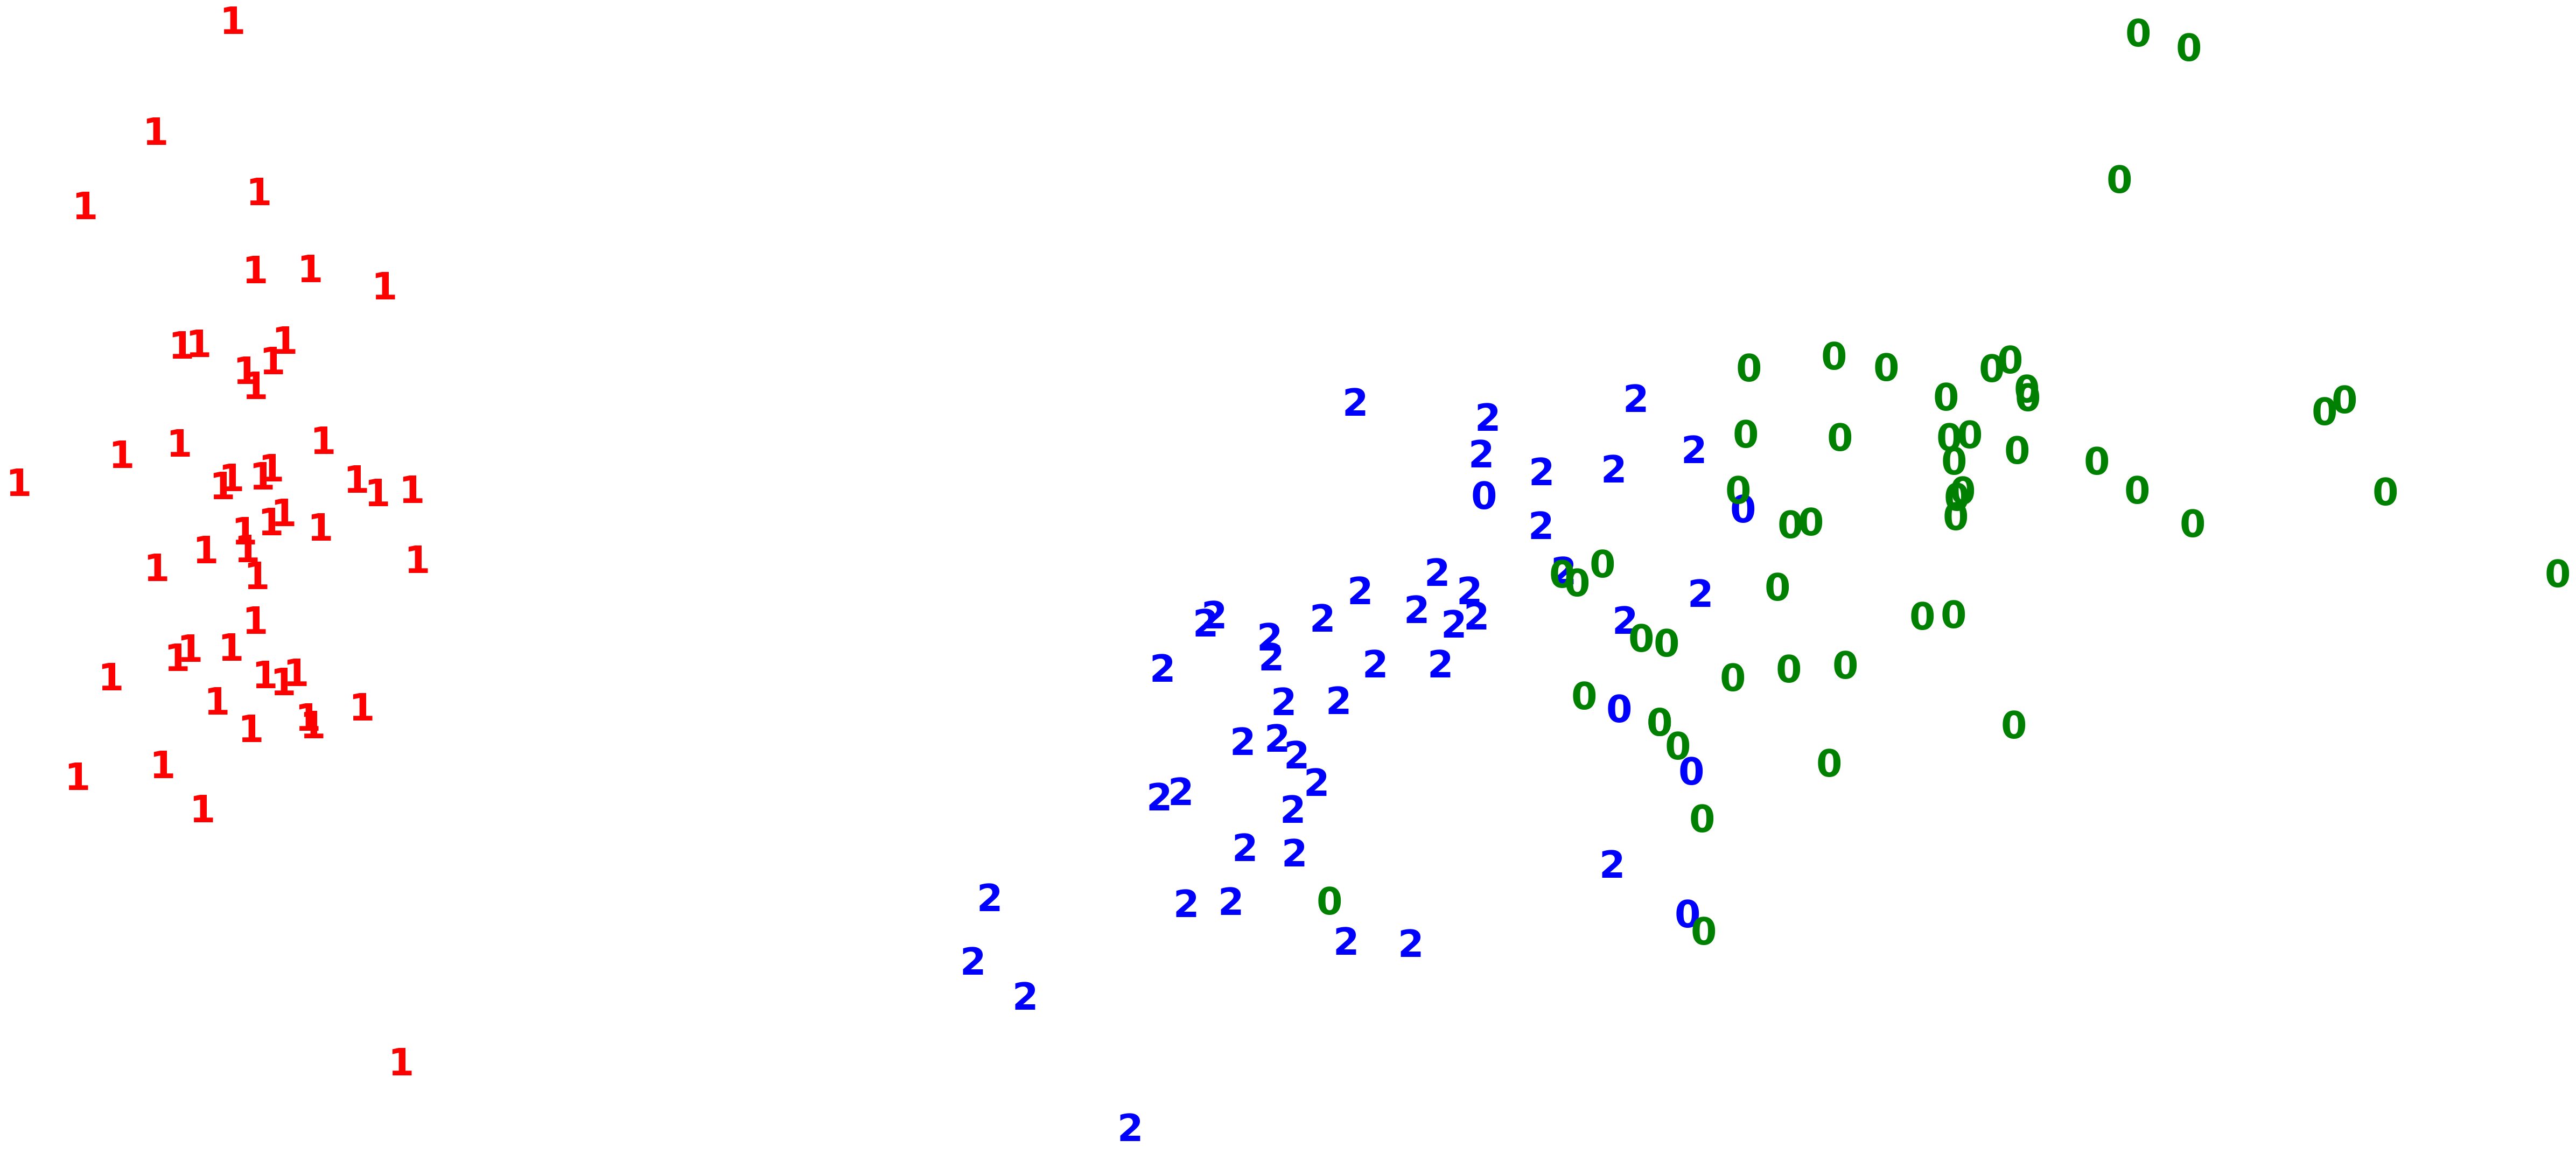

In [4]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

It seems that the GMM solution even separated the linearly non-separable two classes. Let's get the ARI and silhouette scores of this solution:

In [5]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.9038742317748124
The silhoutte score of the GMM solution: 0.37416491866541235


According to the ARI, the GMM solution is very close to 1 which indicates that it did a fairly good job! The ARI score of the GMM solution is by far the highest among the clustering techniques we applied prior to this checkpoint. However, this is not a fair comparison. The scikit-learn implementation of the GaussianMixture uses k-means in the initialization of the means of the Gaussians. So, we should also give credit to k-means as this time GMM raises on the shoulders of it.

Let's tabulate the contingency table to see how well the GMM performed. But before that, let's re-label the clusters for the sake of reading the contingency table more easily:

In [6]:
# re-labeling
clusters = np.array([2 if x == 1 else 1 if x==0 else 0 for x in clusters])

pd.crosstab(y,clusters)

col_0,0,1,2
row_0,,,
0,0,0,50
1,45,5,0
2,0,50,0


Very cool. Only 5 observations seem to be assigned to the wrong cluster. But how about the silhouette score? It's only 0.37 and it's the lowest among the clustering techniques we applied prior to this checkpoint. This is due to the fact that the two classes among the three classes are not linearly separable and they are very close to each other in the high dimensional space. The more an algorithm distinguishes these two classes, the less it gets a silhouette score. Hence, measuring the performances of the clustering algorithms on the Iris dataset using silhouette score misleads us. Confirming this, recall that in the previous checkpoint, DBSCAN achieved the highest silhouette score with a two cluster solution!

Last but not least, we demonstrate the soft clustering aspect of the GMM. We draw the same graph above this time by resizing the points according to the highest probability assigned to them by the winning cluster:

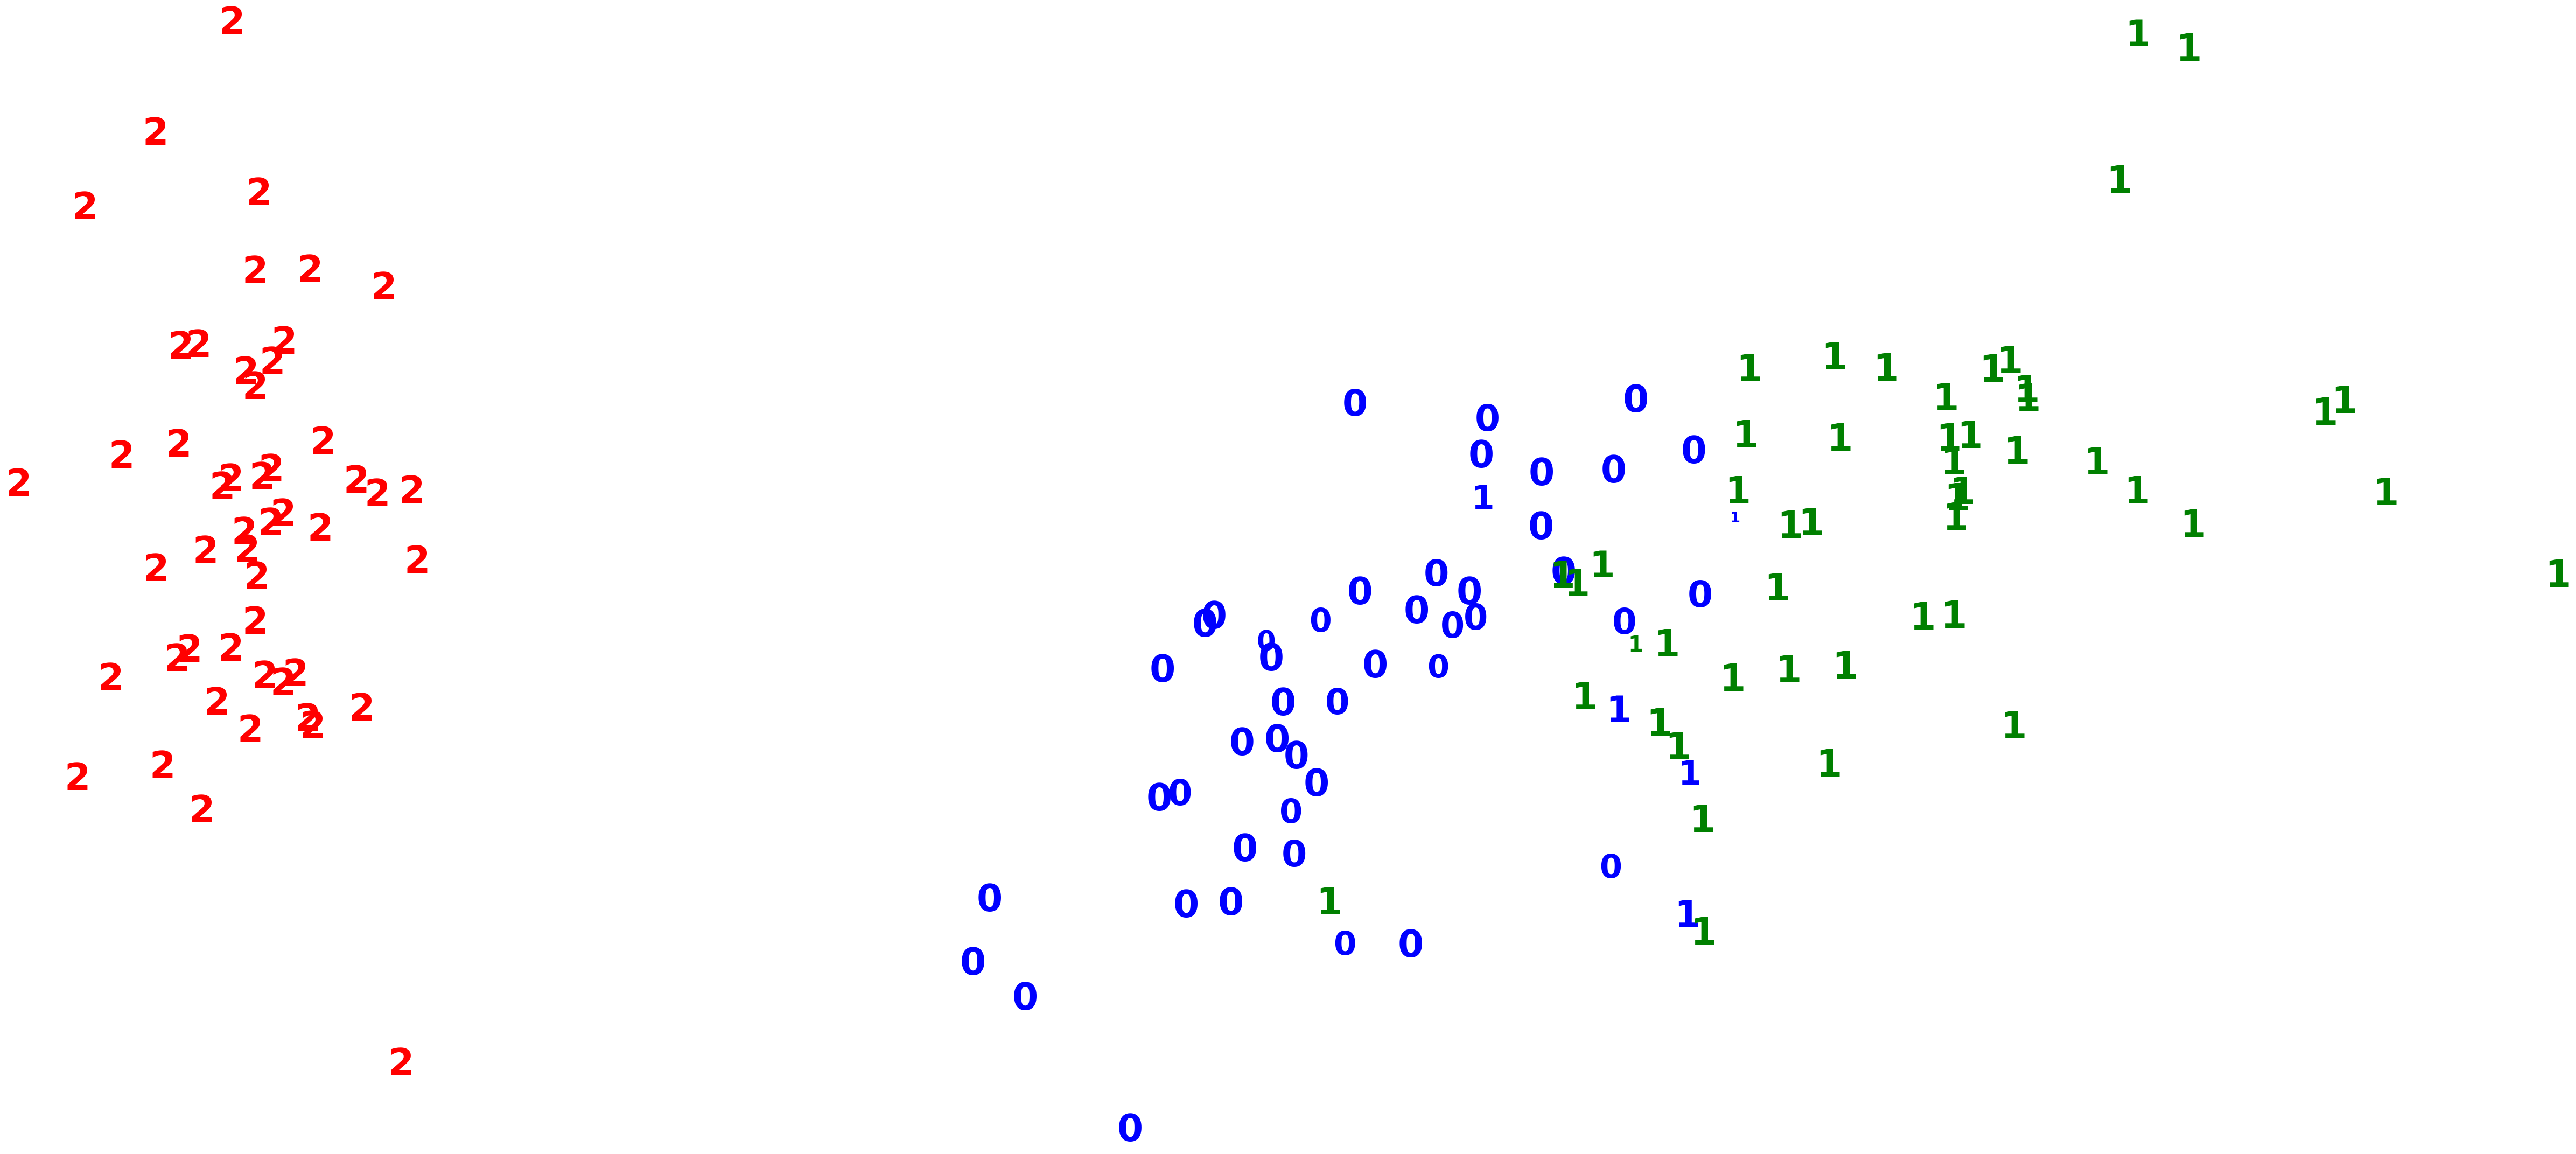

In [8]:
probs = gmm_cluster.predict_proba(X_std)

size = 50 * probs.max(1) ** 2  # square emphasizes differences

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': size[i]}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

As we can expect, the probabilities assigned to the observations of the different classes that are very close to each other are lower than more isolated observations.